**Fraud Detection**

Tasks

- Explore dataset/Visualize
- Decide which features areimportant
- Perform Machine Learning
- Test the model on the testing set


In [0]:
import numpy as np
from sklearn.preprocessing import scale
import random
# Imports
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import pandas as pd
# Visualize
import matplotlib.pyplot as plt

In [0]:
# Quick look to understand data structure
df = pd.read_csv('creditcard.csv')
print(df.head())
print(df.describe())

   Time        V1        V2        V3  ...       V27       V28  Amount  Class
0     0 -1.359807 -0.072781  2.536347  ...  0.133558 -0.021053  149.62    0.0
1     0  1.191857  0.266151  0.166480  ... -0.008983  0.014724    2.69    0.0
2     1 -1.358354 -1.340163  1.773209  ... -0.055353 -0.059752  378.66    0.0
3     1 -0.966272 -0.185226  1.792993  ...  0.062723  0.061458  123.50    0.0
4     2 -1.158233  0.877737  1.548718  ...  0.219422  0.215153   69.99    0.0

[5 rows x 31 columns]
               Time           V1  ...       Amount        Class
count   7973.000000  7973.000000  ...  7972.000000  7972.000000
mean    4257.151261    -0.299740  ...    65.413540     0.003136
std     3198.964299     1.498341  ...   194.911169     0.055915
min        0.000000   -23.066842  ...     0.000000     0.000000
25%     1531.000000    -1.046362  ...     4.617500     0.000000
50%     3635.000000    -0.416341  ...    15.950000     0.000000
75%     6662.000000     1.122758  ...    54.910000     0.0000

25 7947


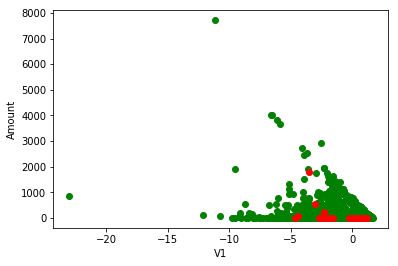

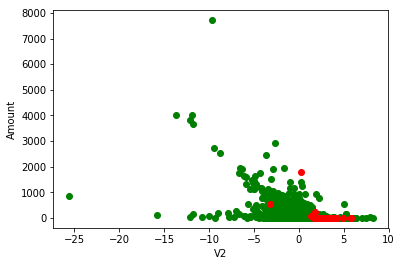

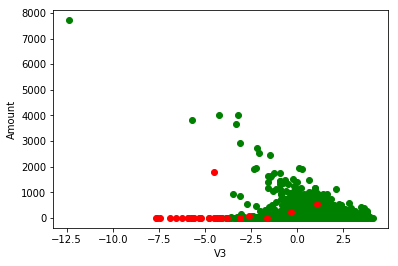

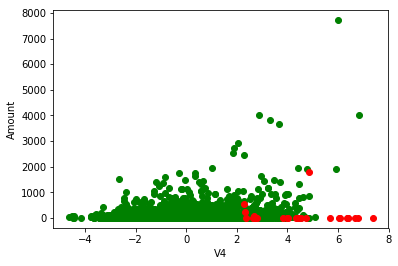

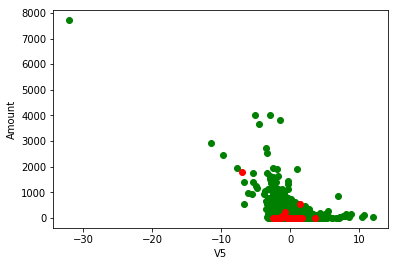

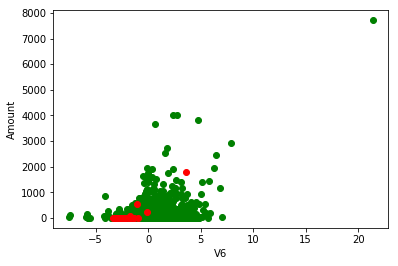

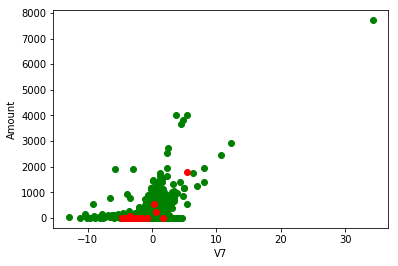

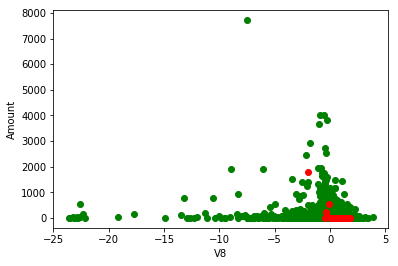

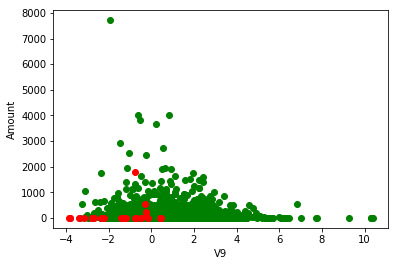

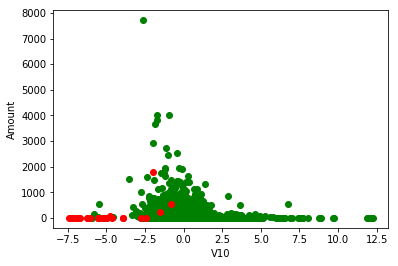

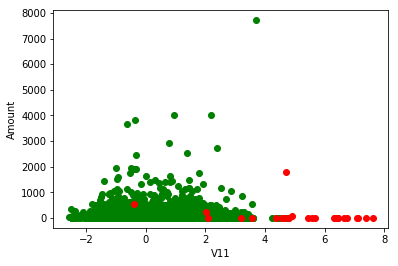

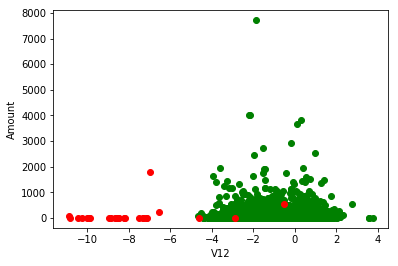

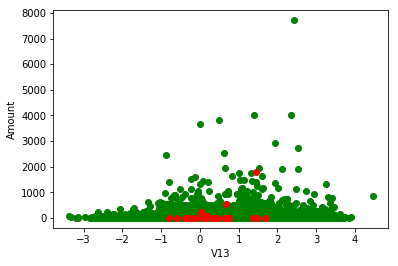

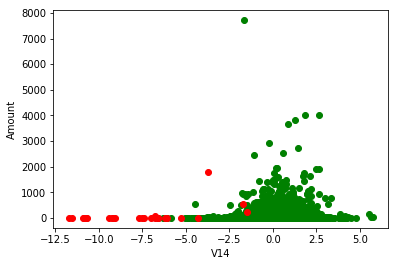

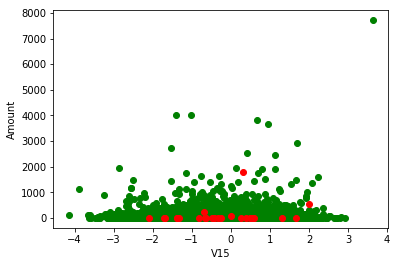

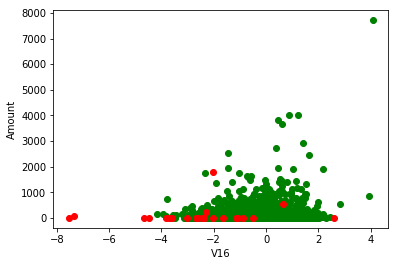

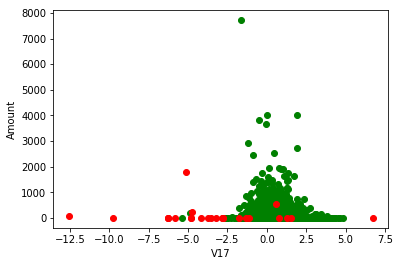

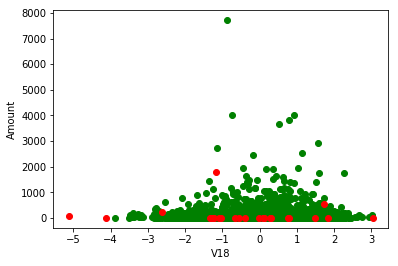

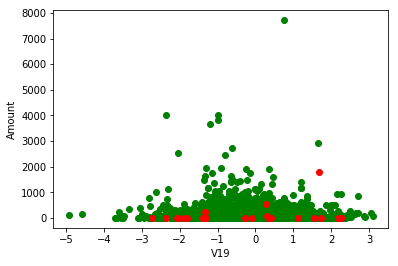

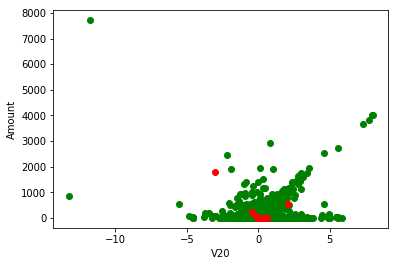

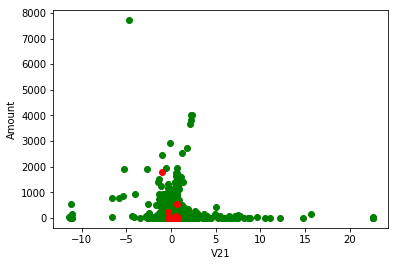

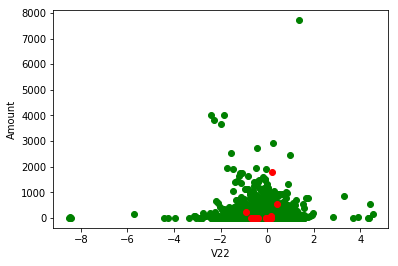

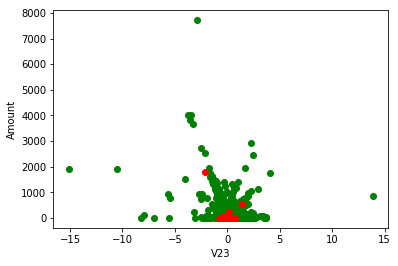

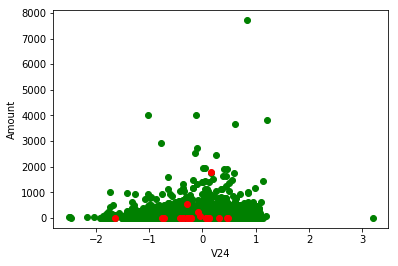

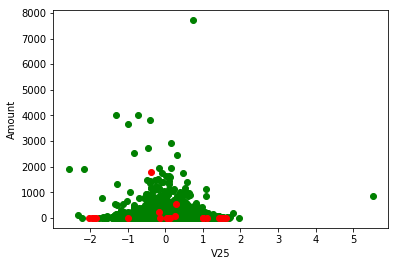

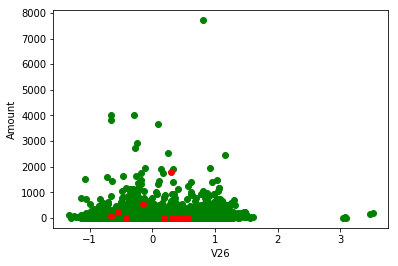

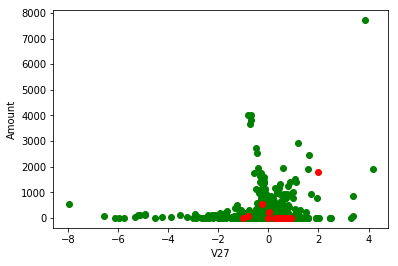

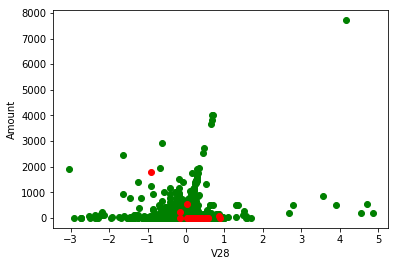

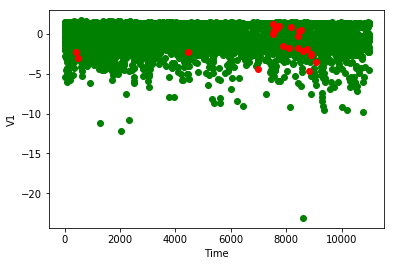

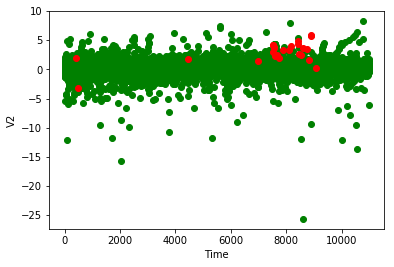

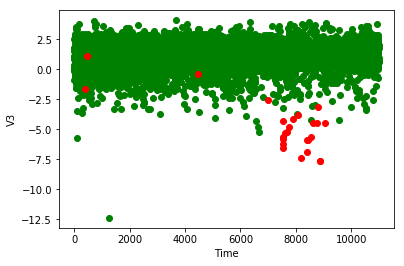

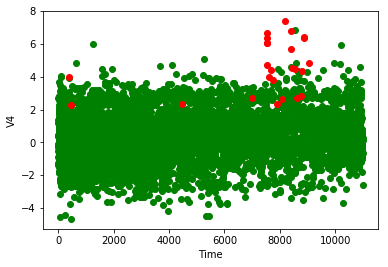

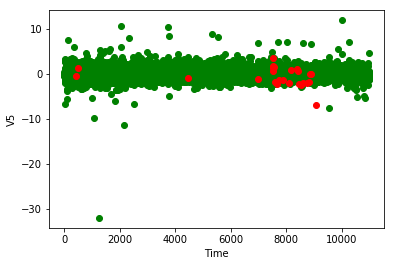

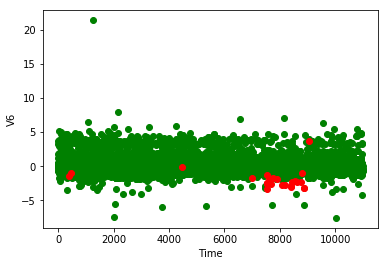

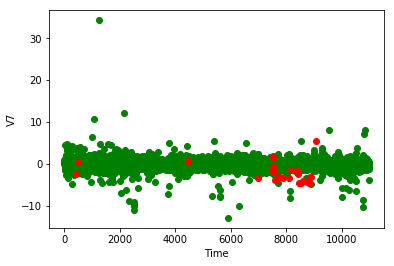

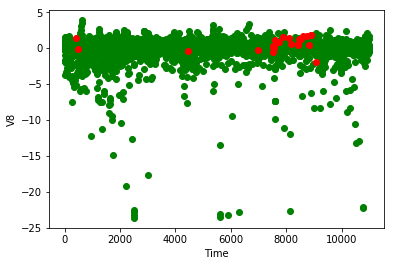

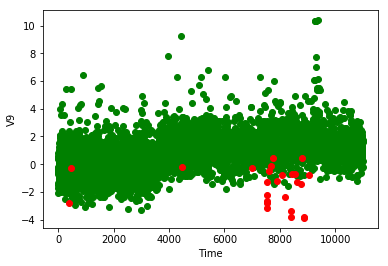

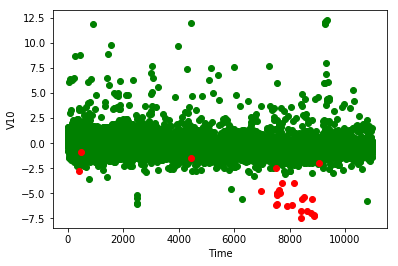

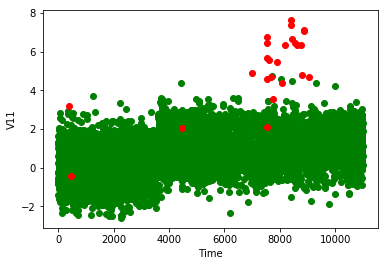

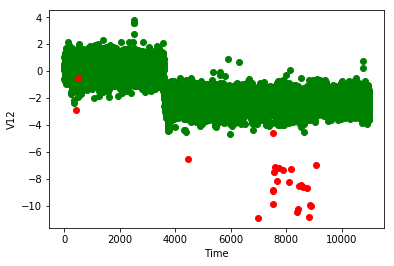

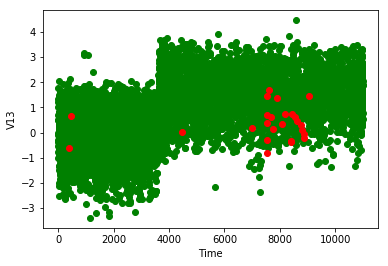

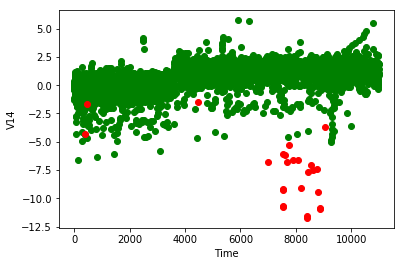

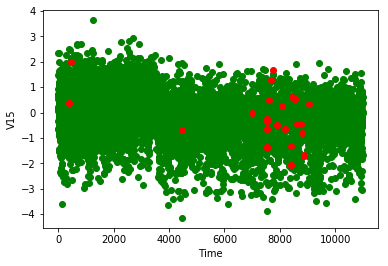

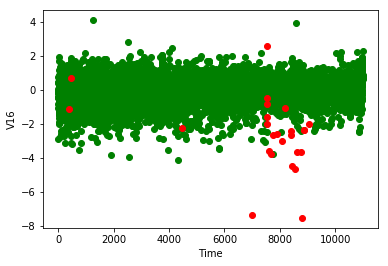

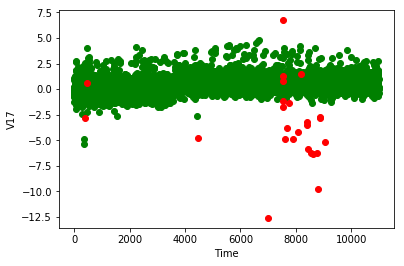

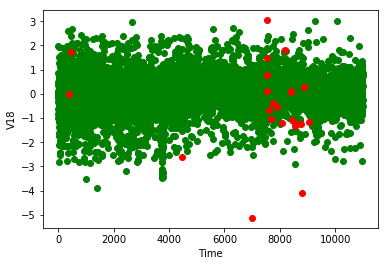

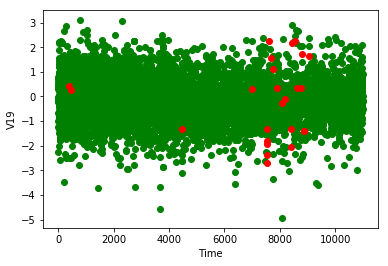

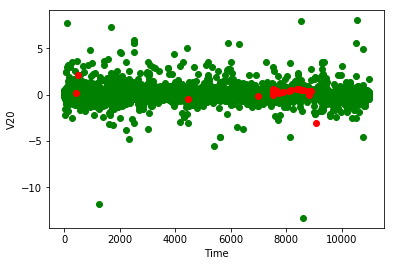

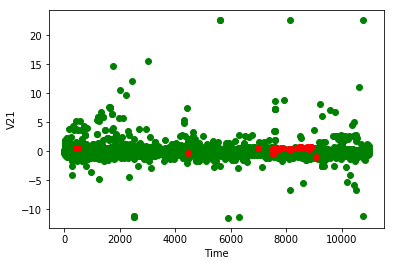

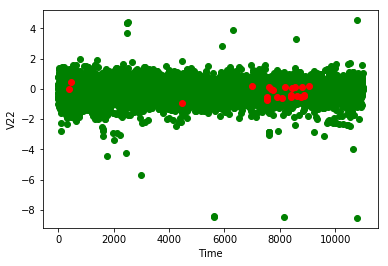

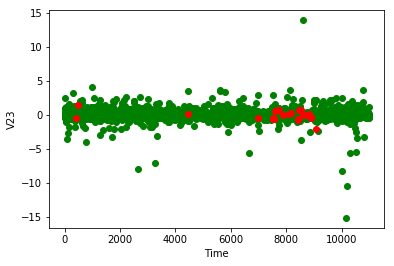

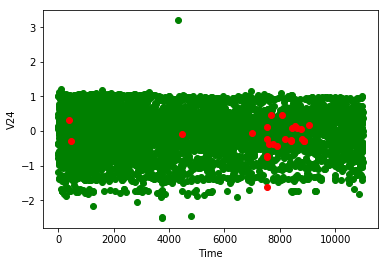

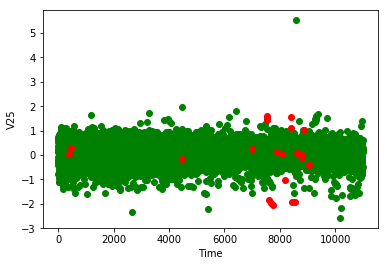

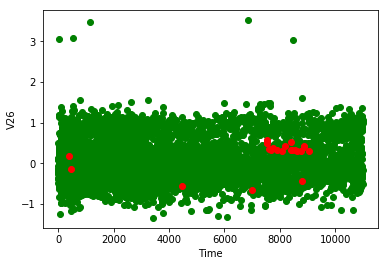

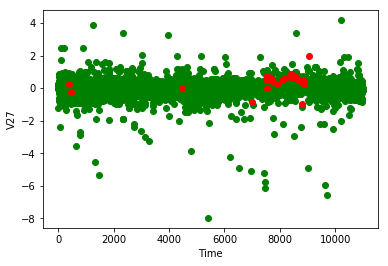

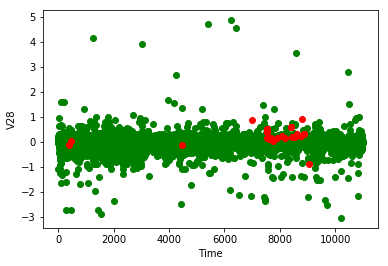

In [0]:
is_fraud = df['Class']==1
is_not_fraud = df['Class']==0

df_fraud = df[is_fraud]
df_not_fraud = df[is_not_fraud]
print(len(df_fraud), len(df_not_fraud))
unknown_features = ['V%d' % number for number in range(1,29)]
for feature in unknown_features:
  plt.plot(df_not_fraud[feature], df_not_fraud['Amount'], 'go', df_fraud[feature], df_fraud['Amount'], 'ro')
  plt.xlabel(feature)
  plt.ylabel('Amount')
  plt.show()
for feature in unknown_features:
  plt.plot(df_not_fraud['Time'], df_not_fraud[feature], 'go', df_fraud['Time'], df_fraud[feature], 'ro')
  plt.ylabel(feature)
  plt.xlabel('Time')
  plt.show()

In [0]:
# we could use df here?
data = pd.read_csv('creditcard.csv')

# Only use the 'Amount' and 'V1', ..., 'V28' features
features = ['Amount'] + ['V%d' % number for number in range(1,29)]

# the target variable to be predicted.
targets = 'Class'

# Split data into X and y containing features and targets only
X = data[features]
y = data[targets]

In [0]:
def normalize(X):
  """
  Make the distribution of the values of each variable similar by subtracting the mean and by dividing by the standard deviation.
  """
  for feature in X.columns:
    X[feature] -= X[feature].mean()
    X[feature] /= X[feature].std()
  return X

In [0]:
# Define the model
model = LogisticRegression()

# Define the splitter for splitting the data in a train set and a test set
splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.5, random_state=0)

# Loop through the splits (only one)
for train_indices, test_indices in splitter.split(X, y):
    # Select the train and test data
    X_train, y_train = X.iloc[train_indices], y.iloc[train_indices]
    X_test, y_test = X.iloc[test_indices], y.iloc[test_indices]
    
    # Normalize the data
    X_train = normalize(X_train)
    X_test = normalize(X_test)
    
    # Fit and predict!
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # And finally: show the results
    print(classification_report(y_test, y_pred))

ValueError: ignored

# TODO
- Upload `creditcard.csv`

In [0]:
df = pd.read_csv('creditcard.csv', low_memory=False)
df = df.sample(frac=1).reset_index(drop=True)
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,113512.0,-0.631525,0.847689,1.977608,-0.522522,0.314973,0.068125,0.485431,0.078710,-0.088494,-1.058717,-0.791412,0.529571,1.093989,-0.337237,0.609655,-0.058167,-0.457437,-0.054096,0.467012,0.090108,-0.172013,-0.440970,-0.244321,0.727241,0.364792,-0.453180,0.078056,0.084074,2.49,0
1,50505.0,1.187338,-0.009534,0.646568,0.309555,-0.201596,0.476928,-0.493503,0.229664,0.070957,0.024090,1.092680,1.095394,0.805500,0.117140,0.845770,0.650645,-0.800754,0.065211,-0.137927,-0.045891,-0.045409,-0.094653,0.017528,-0.632287,0.170334,0.266064,0.009336,0.007328,5.99,0
2,131016.0,-0.703832,0.098610,0.792999,-2.678970,-0.312825,0.705000,0.017631,-1.510079,0.594025,-1.416625,0.425138,0.877692,0.070517,0.122857,-0.259837,1.295910,-1.374008,0.288263,-0.670159,-0.424472,1.240925,-1.566851,-0.728661,0.118540,1.331881,0.374211,0.119493,0.088075,212.96,0
3,41759.0,-1.284542,1.609765,1.113289,-0.201075,-0.174819,-0.452246,0.301709,0.153765,-0.361759,-0.152905,-0.770306,0.664563,1.718923,-0.171835,0.791455,0.372802,-0.607748,-0.111939,0.130173,-0.048573,0.039201,0.028910,-0.120375,-0.070627,-0.317296,0.085864,-1.029790,-0.444955,1.99,0
4,46370.0,-0.801870,0.456437,2.449383,0.829449,-1.367238,0.266579,-0.799944,0.657257,-1.328500,0.138852,-0.427090,0.604121,1.045024,-0.313358,0.427901,-2.239964,0.982530,0.898390,-0.441797,-0.416460,-0.212053,-0.035804,0.053599,0.588563,-0.336139,-0.274226,0.105291,0.063320,12.90,0


In [0]:
fraud = df.loc[df['Class'] == 1]
non_fraud = df.loc[df['Class'] == 0]
print(len(fraud))
print(len(non_fraud))

492
284315


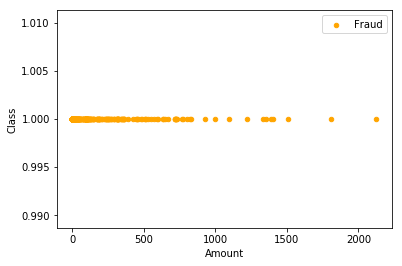

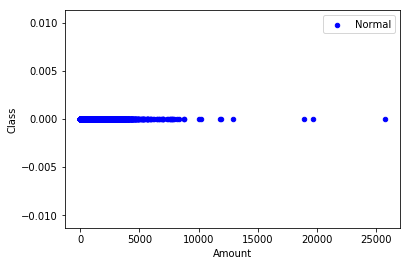

In [0]:
ax = fraud.plot.scatter(x='Amount', y='Class', color='Orange', label='Fraud')
non_fraud.plot.scatter(x='Amount', y='Class', color='Blue', label='Normal')
plt.show()

In [0]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [0]:
X = df.iloc[:, :-1]
Y = df['Class']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.35)


In [0]:
logistic = linear_model.LogisticRegression(C=1e8)
logistic.fit(X_train, Y_train)
print('Score:', logistic.score(X_test, Y_test))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Score: 0.9990770743256122
